In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv("../data/raw/diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
(df == 0).sum()


Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [4]:
df['Outcome'].value_counts()
df['Outcome'].value_counts(normalize=True)


Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

## 3. Missing Value Analysis
In this dataset, some features contain biologically impossible zero values, which indicate missing measurements rather than actual zeros.


In [8]:
cols_with_zero_as_missing = [
    'Glucose', 
    'BloodPressure', 
    'SkinThickness', 
    'Insulin', 
    'BMI'
]

(df[cols_with_zero_as_missing] == 0).sum()


Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [9]:
df_mv = df.copy()
df_mv[cols_with_zero_as_missing] = df_mv[cols_with_zero_as_missing].replace(0, np.nan)

df_mv.isnull().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

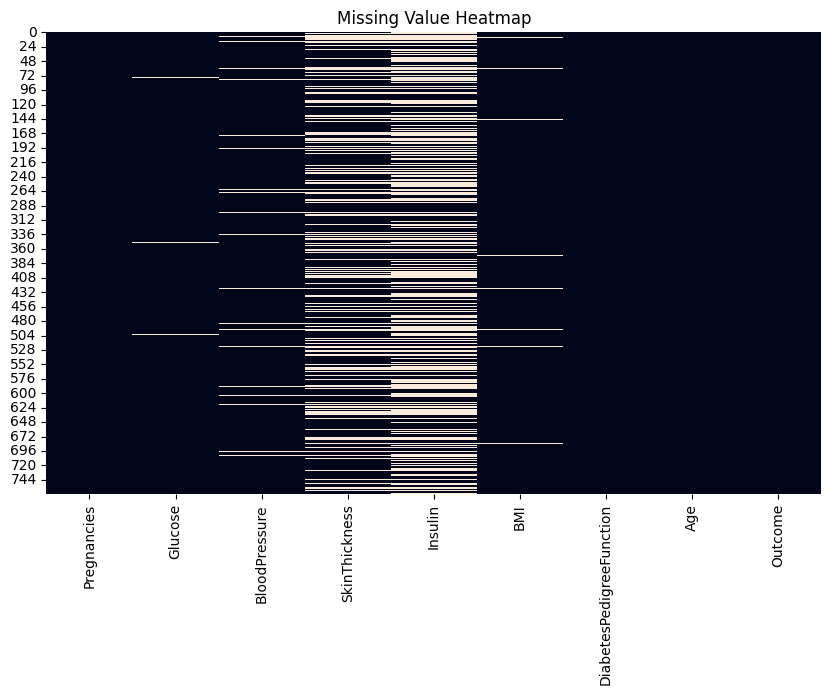

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df_mv.isnull(), cbar=False)
plt.title("Missing Value Heatmap")
plt.show()


The heatmap shows that several features, especially Insulin and SkinThickness, contain a significant number of missing values. These missing values will be handled during the preprocessing stage.


## 4. Distribution Analysis


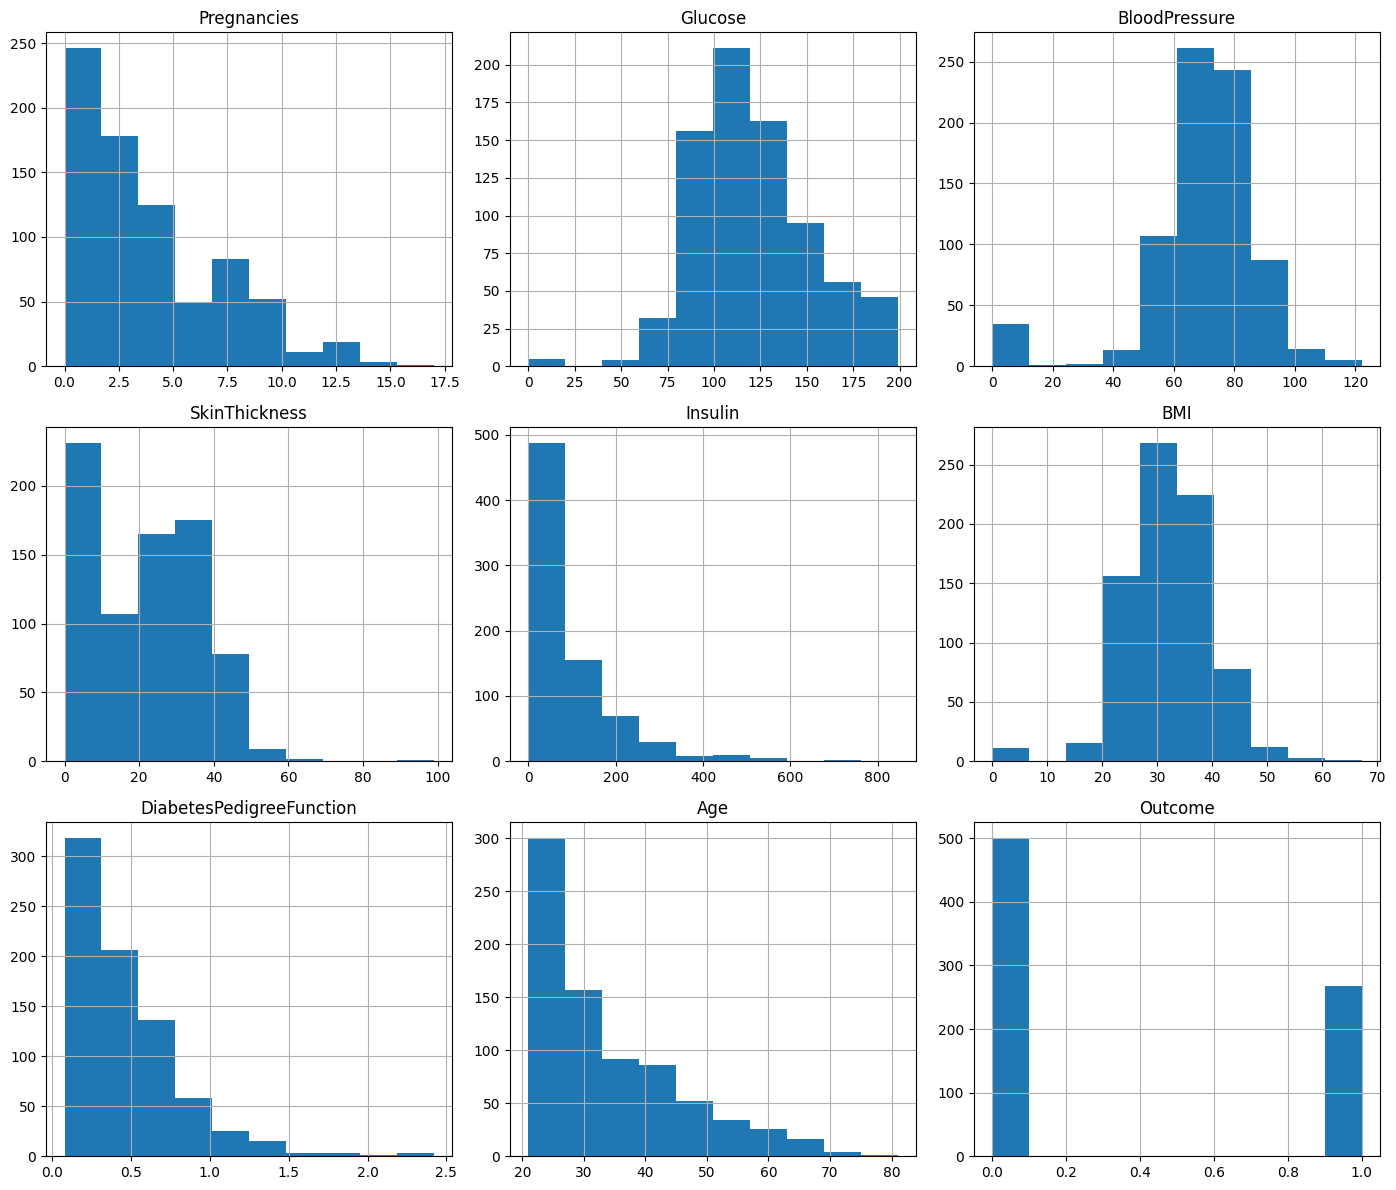

In [11]:
df.hist(figsize=(14,12))
plt.tight_layout()
plt.show()


The distributions show that some features are skewed and contain extreme values, particularly Insulin and BMI. This suggests the presence of outliers and the need for scaling.


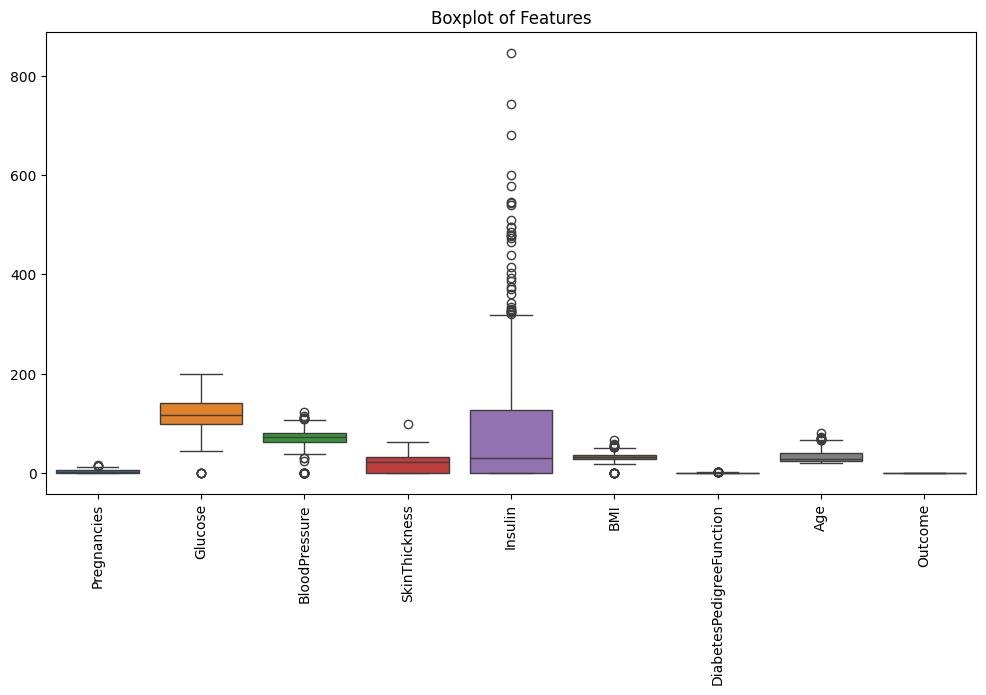

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot of Features")
plt.show()


## 5. Feature vs Target Analysis


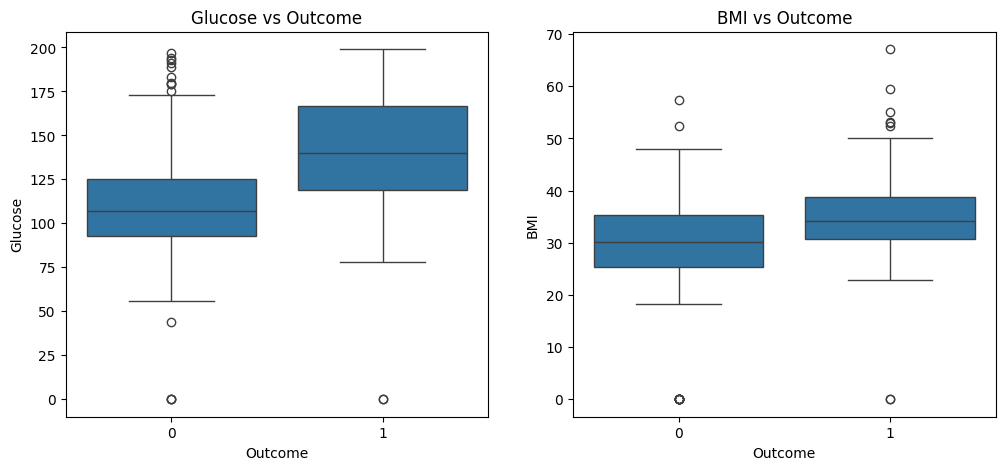

In [13]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Glucose vs Outcome')

plt.subplot(1,2,2)
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.title('BMI vs Outcome')

plt.show()


Patients with diabetes (Outcome = 1) tend to have higher Glucose and BMI values compared to non-diabetic patients.


## 6. Correlation Analysis


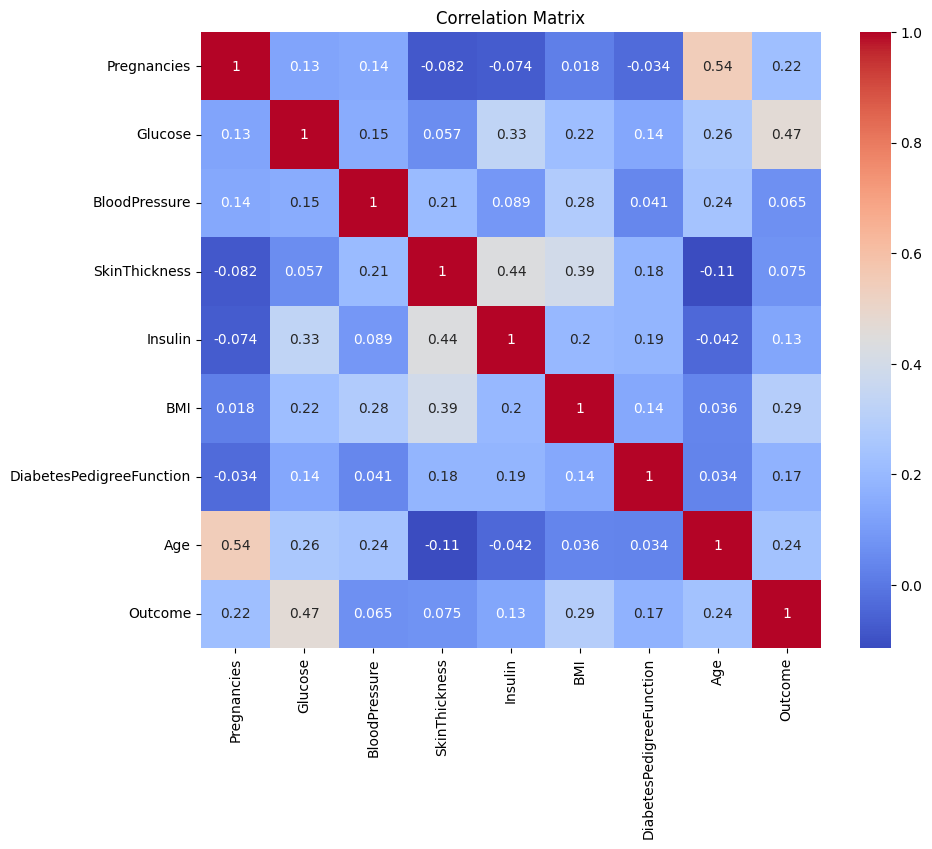

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


## 7. EDA Summary

Exploratory Data Analysis revealed that the dataset contains hidden missing values, skewed distributions, and several outliers. Glucose and BMI show strong relationships with the target variable, making them important predictors for diabetes classification. These findings guide the preprocessing and modeling steps of the project.
